In [1]:
import numpy as np
import sys
import time
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.activations import *
from keras.models import Model
from keras.preprocessing.image import *
import keras.backend as K
import numpy
import math
import matplotlib.pyplot as plt
import PIL

# Loading VGG19

In [2]:
from keras.applications import VGG19
model = VGG19()

# Reconstruct feature maps of each layer into Input pixel space

In [3]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
block_1 = model.layers[3].output
block_2 = model.layers[6].output
block_3 = model.layers[11].output
block_4 = model.layers[16].output
block_5 = model.layers[21].output

# reconstructing layers_4
block_4 = keras.layers.UpSampling2D(size = (2,2))(block_4)
block_4 = keras.layers.Activation('relu')(block_4)
deconv_4_4 = keras.layers.Conv2DTranspose(filters = 512, kernel_size = (3,3), strides = 1, padding = 'same')
block_4 = deconv_4_4(block_4)
block_4 = keras.layers.Activation('relu')(block_4)
deconv_4_3 = keras.layers.Conv2DTranspose(filters = 512, kernel_size = (3,3), strides = 1, padding = 'same')
block_4 = deconv_4_3(block_4)
block_4 = keras.layers.Activation('relu')(block_4)
deconv_4_2 = keras.layers.Conv2DTranspose(filters = 512, kernel_size = (3,3), strides = 1, padding = 'same')
block_4 = deconv_4_2(block_4)
block_4 = keras.layers.Activation('relu')(block_4)
deconv_4_1 = keras.layers.Conv2DTranspose(filters = 256, kernel_size = (3,3), strides = 1, padding = 'same')
block_4 = deconv_4_1(block_4)

block_4 = keras.layers.UpSampling2D(size = (2,2))(block_4)
block_4 = keras.layers.Activation('relu')(block_4)
deconv_3_4 = keras.layers.Conv2DTranspose(filters = 256, kernel_size = (3,3), strides = 1, padding = 'same')
block_4 = deconv_3_4(block_4)
block_4 = keras.layers.Activation('relu')(block_4)
deconv_3_3 = keras.layers.Conv2DTranspose(filters = 256, kernel_size = (3,3), strides = 1, padding = 'same')
block_4 = deconv_3_3(block_4)
block_4 = keras.layers.Activation('relu')(block_4)
deconv_3_2 = keras.layers.Conv2DTranspose(filters = 256, kernel_size = (3,3), strides = 1, padding = 'same')
block_4 = deconv_3_2(block_4)
block_4 = keras.layers.Activation('relu')(block_4)
deconv_3_1 = keras.layers.Conv2DTranspose(filters = 128, kernel_size = (3,3), strides = 1, padding = 'same')
block_4 = deconv_3_1(block_4)

block_4 = keras.layers.UpSampling2D(size = (2,2))(block_4)
block_4 = keras.layers.Activation('relu')(block_4)
deconv_2_2 = keras.layers.Conv2DTranspose(filters= 128, kernel_size = (3,3), strides= 1, padding = 'same')
block_4 = deconv_2_2(block_4)
block_4 = keras.layers.Activation('relu')(block_4)
deconv_2_1 = keras.layers.Conv2DTranspose(filters= 64, kernel_size = (3,3), strides = 1, padding = 'same')
block_4 = deconv_2_1(block_4)

block_4 = keras.layers.UpSampling2D(size = (2,2))(block_4)
block_4 = keras.layers.Activation('relu')(block_4)
deconv_1_2 = keras.layers.Conv2DTranspose(filters= 64, kernel_size = (3,3), strides= 1, padding = 'same')
block_4 = deconv_1_2(block_4)
block_4 = keras.layers.Activation('relu')(block_4)
deconv_1_1 = keras.layers.Conv2DTranspose(filters= 3, kernel_size = (3,3), strides = 1, padding = 'same')
block_4 = deconv_1_1(block_4)

# reconstructing layers 3
block_3 = keras.layers.UpSampling2D(size = (2,2))(block_3)
block_3 = keras.layers.Activation('relu')(block_3)
block_3 = deconv_3_4(block_3)
block_3 = keras.layers.Activation('relu')(block_3)
block_3 = deconv_3_3(block_3)
block_3 = keras.layers.Activation('relu')(block_3)
block_3 = deconv_3_2(block_3)
block_3 = keras.layers.Activation('relu')(block_3)
block_3 = deconv_3_1(block_3)

block_3 = keras.layers.UpSampling2D(size = (2,2))(block_3)
block_3 = keras.layers.Activation('relu')(block_3)
block_3 = deconv_2_2(block_3)
block_3 = keras.layers.Activation('relu')(block_3)
block_3 = deconv_2_1(block_3)

block_3 = keras.layers.UpSampling2D(size = (2,2))(block_3)
block_3 = keras.layers.Activation('relu')(block_3)
block_3 = deconv_1_2(block_3)
block_3 = keras.layers.Activation('relu')(block_3)
block_3 = deconv_1_1(block_3)

# reconstructing layers 2
block_2 = keras.layers.UpSampling2D(size = (2,2))(block_2)
block_2 = keras.layers.Activation('relu')(block_2)
block_2 = deconv_2_2(block_2)
block_2 = keras.layers.Activation('relu')(block_2)
block_2 = deconv_2_1(block_2)

block_2 = keras.layers.UpSampling2D(size = (2,2))(block_2)
block_2 = keras.layers.Activation('relu')(block_2)
block_2 = deconv_1_2(block_2)
block_2 = keras.layers.Activation('relu')(block_2)
block_2 = deconv_1_1(block_2)

# reconstructing layers 1
block_1 = keras.layers.UpSampling2D(size = (2,2))(block_1)
block_1 = keras.layers.Activation('relu')(block_1)
block_1 = deconv_1_2(block_1)
block_1 = keras.layers.Activation('relu')(block_1)
block_1 = deconv_1_1(block_1)


In [47]:
conv_layers = []
conv_layers_idx = []
for layer in model.layers:
    if 'conv' in layer.name:
        conv_layers.append(layer)
deconv_layers = [deconv_1_1, deconv_1_2, deconv_2_1, deconv_2_2, deconv_3_1, deconv_3_2, deconv_3_3, deconv_3_4, deconv_4_1,  deconv_4_2, deconv_4_3,  deconv_4_4]

# copy weights from convolution layers to deconvolution layer
for i, deconv_layer in enumerate(deconv_layers):
    conv_layer = conv_layers[i]
    W, _ = conv_layer.get_weights()
    _, b = deconv_layer.get_weights()
    deconv_layer.set_weights([np.transpose(W, [1,0,2,3]), np.zeros_like(b)])

In [48]:
model_reconstruct = Model(model.input, [block_1, block_2, block_3, block_4])

# Check out on my Image

In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [30]:
img1 = load_img('/content/drive/MyDrive/작업용사진들/20210406_210025.jpg')
img2 = load_img('/content/drive/MyDrive/작업용사진들/20210410_202625.jpg')
img3 = load_img('/content/drive/MyDrive/작업용사진들/Screenshot_20210415-103142_Photos.jpg')

In [31]:
img1 = tf.image.resize(img_to_array(img1), [224, 224])
img2 = tf.image.resize(img_to_array(img2), [224, 224])
img3 = tf.image.resize(img_to_array(img3), [224, 224])
images = np.array([img1, img2, img3])
images /= 255.0

In [49]:
l1_proj, l2_proj, l3_proj, l4_proj = model_reconstruct.predict(images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

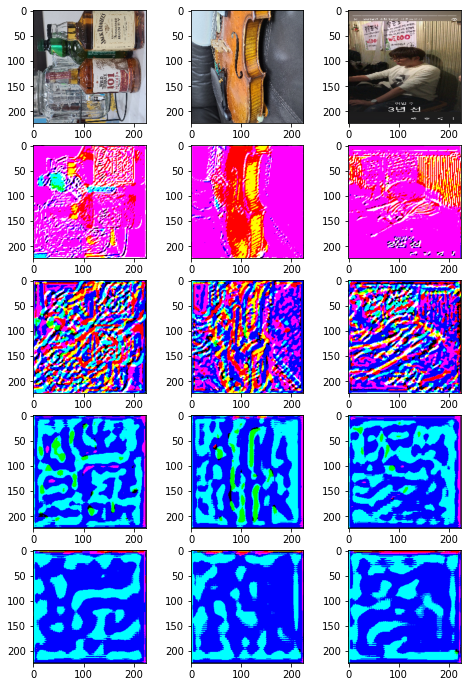

In [50]:
fig = plt.figure(figsize = (8, 12))
k = 1
for layer_proj in [images, l1_proj, l2_proj, l3_proj, l4_proj]:
    for i in range(3):
        plt.subplot(5, 3, k)
        plt.imshow(layer_proj[i])
        k += 1